![generali-fit-250x200-90.jpg](attachment:generali-fit-250x200-90.jpg)![image.png](attachment:image.png)

# Insurance usecase

# Introduction to KERAS Library for Neural Network Modelling  <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> 

The goal here is to familiarize ourselves with the KERAS Library in Python, which is a package very useful to easily build and compile simple and deep neural networks.

This is a very intuitive package that runs very fast and has a lot of options, making it a really good choice to start in deep neural network processing.

## 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn
import gc
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
## read datasets
pathData = '/Users//reizinecharles//Desktop//Cours_Hadrian_Generali/'

train = pd.read_csv(pathData+'trainDataset.csv')
Y = train['target'].as_matrix()
DF_X = train.drop('target',axis=1)

test =  pd.read_csv(pathData+'testDataset.csv')
Y_test = test['target'].as_matrix()
DF_X_test = test.drop('target',axis=1)

In [3]:
## Transform the types of each column
for c in DF_X.columns:
    if 'Cat_' in c:
        DF_X[c] = DF_X[c].astype(str)
        DF_X_test[c] = DF_X_test[c].astype(str)
    else:
        DF_X[c] = DF_X[c].astype(float)
        DF_X_test[c] = DF_X_test[c].astype(float)

### Encoding the categorical variables

In [4]:
# Encode categorical variables
DF_X = DF_X.copy()
DF_X_test = DF_X_test.copy()
for var in DF_X.columns:
    if str(DF_X[var].dtypes)=='object':
        le = LabelEncoder().fit(DF_X[var])
        DF_X[var] = le.transform(DF_X[var])
        DF_X_test[var] = le.transform(DF_X_test[var])

### Categorization of the output variable

In [5]:
# Categorization
treshold_ExLR = 0.75

Id_0_train = np.nonzero(Y<treshold_ExLR)[0]
Id_0_test = np.nonzero(Y_test<treshold_ExLR)[0]

Id_1_train = np.nonzero(Y>=treshold_ExLR)[0]
Id_1_test = np.nonzero(Y_test>=treshold_ExLR)[0]

Y[Id_0_train] = 0
Y[Id_1_train] = 1

Y_test[Id_0_test] = 0
Y_test[Id_1_test] = 1

In [6]:
# Var importance using RF classifier
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=0, n_estimators=100,\
                                  criterion='gini',max_depth=5)
VarImp = estimator.fit(DF_X,Y).feature_importances_

VarToUse = np.array(DF_X.columns.tolist())[np.argsort(-VarImp)[:50]]
print(VarToUse)
print('')

['Num_Car11' 'Num_Car15' 'Num_Car9' 'NumInsurance13' 'NumInsurance11'
 'Cat_Insurance4' 'Cat_Insurance3' 'NumInsurance12' 'Num_Car19'
 'NumInsurance16' 'Cat_Car7' 'Num_Car16' 'Num_Car14' 'NumInsurance14'
 'Cat_Insurance2' 'Num_Car17' 'Num_Insurance1' 'Num_Driver10'
 'NumInsurance15' 'Num_Car18' 'Num_Driver7' 'Num_Driver9' 'Num_Insurance6'
 'NumInsurance10' 'Num_Insurance8' 'Cat_Car4' 'Num_Insurance7'
 'NumInsurance9' 'Cat_Driver1' 'Cat_Insurance5' 'Cat_Car6' 'Cat_Car2'
 'Num_Car13' 'Cat_Driver6' 'Num_Driver8' 'Num_Car12' 'Cat_Driver2'
 'Cat_Driver4' 'Num_Claim1' 'Cat_Driver5' 'Cat_Car3' 'Cat_Car5'
 'Num_Claim3' 'Num_Claim2' 'Cat_Car8' 'Cat_Driver3' 'Cat_Car1']



**IMPORTATION OF KERAS LIBRARY**

In [7]:
# Import keras functions
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### 2. Build One layer hidden network KERAS

**Sampling and normalization**

In [8]:
IdRand = np.sort(np.random.permutation(np.arange(len(Y)))[:5000])

X_sample = DF_X[VarToUse].as_matrix()[IdRand]
Y_sample = Y[IdRand]

# Normalization
from sklearn.preprocessing import MinMaxScaler
normX = MinMaxScaler()
normX.fit(X_sample)
X_sample_norm = normX.transform(X_sample)

In [9]:
nbVar = X_sample_norm.shape[1]
nbNeuronByHiddenLayer = X_sample_norm.shape[1]

Let's begin the model :

In [24]:
# Model initialisation
model = Sequential()

In [25]:
# One fully connected hidden layer
# same number of neurons as nb var
model.add(\
      Dense(1, input_dim=nbVar,\
            kernel_initializer='normal', activation='sigmoid'))

Now that we have constructed the model, we have to compile it :

In [26]:
# Compile model
# more info: https://keras.io/optimizers/
from keras.optimizers import SGD
model.compile(loss='binary_crossentropy',\
              optimizer=SGD(lr=0.1, momentum=0), metrics=['accuracy'])

It is time to train the model :

In [27]:
# Model training
model.fit(X_sample_norm,Y_sample.reshape(len(Y_sample),1),epochs=10,batch_size=128)

Epoch 1/10
5000/5000 [==============================] - 0s - loss: 0.3873 - acc: 0.8728     
Epoch 2/10
5000/5000 [==============================] - 0s - loss: 0.3482 - acc: 0.8876     
Epoch 3/10
5000/5000 [==============================] - 0s - loss: 0.3470 - acc: 0.8876     
Epoch 4/10
5000/5000 [==============================] - 0s - loss: 0.3458 - acc: 0.8876     

The prediction is done this way :

In [28]:
# prediction on train sample
KerasPredTrain = model.predict(normX.transform(DF_X[VarToUse].as_matrix()))
KerasPredTrain = KerasPredTrain.reshape(Y.shape)

# prediction on test sample
KerasPredTest = model.predict(normX.transform(DF_X_test[VarToUse].as_matrix()))
KerasPredTest = KerasPredTest.reshape(Y_test.shape) 

** RESULTS AND ROC CURVE ** :

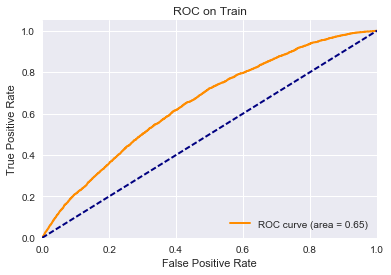

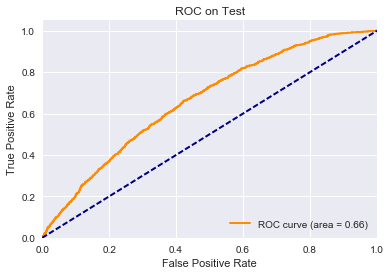

In [29]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y,KerasPredTrain)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Train')
plt.legend(loc="lower right")
plt.show()


fpr_test, tpr_test, _ = roc_curve(\
                Y_test,KerasPredTest)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Test')
plt.legend(loc="lower right")
plt.show()


### 3. Multiple hidden layers network 

The idea here is to rebuild the Multiple-Layers neural network model using the KERAS Library.
We use the same method as the one from the One-Layer Keras network.

** Exercice ** :

Implement the multiple-layers neural network using the KERAS library.

If we write (input_dim, output_dim) the dimensions of a layer :

* The first hidden layer must be of dimensions (nbVar, nbNeuronByHiddenLayer)
* The second hidden layer must be of dimensions (nbNeuronByHiddenLayer, nbNeuronByHiddenLayer)
* The layers must have a sigmoid as an activation function, and kernel_initializer='normal'
* A third layer will be added as an activation layer whose output_dim is equal to 1.


In [43]:
nbVar = X_sample_norm.shape[1]
nbNeuronByHiddenLayer = X_sample_norm.shape[1]


model = Sequential()
############# ENTER YOUR CODE HERE ##################
model.add(\
      Dense(10, input_dim=nbVar,\
            kernel_initializer='normal', activation='sigmoid'))
model.add(\
      Dense(1,\
            kernel_initializer='normal', activation='sigmoid'))
############# END OF THE CODE ##################

model.compile(loss='binary_crossentropy',\
              optimizer=SGD(lr=0.1, momentum=0), metrics=['accuracy'])

In [47]:
model.fit(X_sample_norm,Y_sample.reshape(len(Y_sample),1),epochs=30)


Epoch 1/30
5000/5000 [==============================] - 0s - loss: 0.3485 - acc: 0.8876     
Epoch 2/30
5000/5000 [==============================] - 0s - loss: 0.3479 - acc: 0.8876     

In [48]:
# prediction on train sample
KerasPredTrain = model.predict(normX.transform(DF_X[VarToUse].as_matrix()))
KerasPredTrain = KerasPredTrain.reshape(Y.shape)

# prediction on test sample
KerasPredTest = model.predict(normX.transform(DF_X_test[VarToUse].as_matrix()))
KerasPredTest = KerasPredTest.reshape(Y_test.shape) 

** RESULTS AND ROC CURVE **

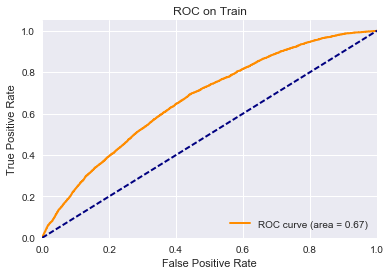

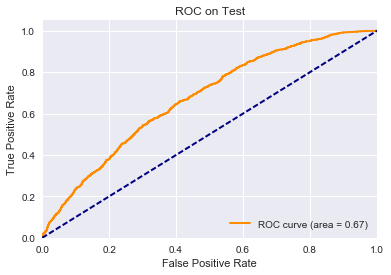

In [49]:
fpr, tpr, _ = roc_curve(Y,KerasPredTrain)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Train')
plt.legend(loc="lower right")
plt.show()


fpr_test, tpr_test, _ = roc_curve(\
                Y_test,KerasPredTest)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Test')
plt.legend(loc="lower right")
plt.show()

